C:\Users\1395358\AppData\Local\Temp\ipykernel_9560\988705367.py:139: RuntimeWarning: invalid value encountered in power
  y1 = (8 - x**3)**(1/3)
C:\Users\1395358\AppData\Local\Temp\ipykernel_9560\988705367.py:140: RuntimeWarning: invalid value encountered in power
  y2 = 3 - x**(3/2)


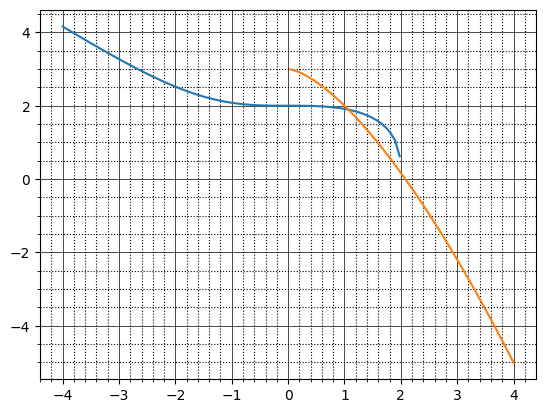

(array([1.0707919 , 1.89195444]), 2)
(0.826019287109375, -0.0007251309901601388, 15)
(0.8260389237147489, -7.61105125164363e-05, 37)
(0.34582939640857735, 2.837641845232497e-05, 6)
(0.3458245712301762, -4.002576048378614e-12, 5)


In [4]:
import matplotlib.pyplot as plt
import numpy as np


def f(x):
    return 3 * x ** 4 + 8 * x ** 3 + 6 * x ** 2 - 10


def dihotom(a, b, e): # метод дихотомии 
    left = a
    right = b
    n = 0
    if f(left) * f(right) > 0:
        return False
    while abs(right - left) > e:
        n += 1
        center = (left + right) / 2
        if f(center) * f(left) < 0:
            right = center
            continue
        if f(center) * f(right) < 0:
            left = center
    c = (left + right) / 2
    return c, f(c), n


def hord(a, b, e): # Метод хорд
    x = a
    n = 0
    while abs(f(x)) >= e:
        new_x = x - ((b - x) * (f(x)) / (f(b) - f(x)))
        x = new_x
        n += 1
    return x, f(x), n


def fn(x):
    return 2 ** x + 5 * x - 3


def diffn(x):
    return 0.693141 * 2 ** x + 5


def phfn(x):
    return (3 - 2**x) / 5


def iteration(a, b, e): # Метод простых итераций
    n = 1
    x = (b + a) / 2
    new_x = phfn(x)
    while abs(x-new_x) > e:
        x = new_x
        new_x = phfn(x)
        n += 1
        if new_x < a or new_x > b:
            return False
    return new_x, fn(new_x), n



def nyuton(a, b, e):
    n = 1
    x = (b + a) / 2
    new_x = x - diffn(x) / fn(x)
    while abs(x-new_x) > e:
        x = new_x
        new_x = x - fn(x) / diffn(x)
        n += 1
        if new_x < a or new_x > b:
            return False
    return new_x, fn(new_x), n



def f1(vctr):
    x = vctr[0]
    y = vctr[1]
    return x**3 + y**3 - 8


def f2(vctr):
    x = vctr[0]
    y = vctr[1]
    return y + x**(3/2) - 3


def dif1x(vctr):
    x = vctr[0]
    y = vctr[1]
    return 3 * x**2


def dif1y(vctr):
    x = vctr[0]
    y = vctr[1]
    return 3 * y**2


def dif2x(vctr):
    x = vctr[0]
    y = vctr[1]
    return (3 / 2) * x ** (1/2)


def dif2y(vctr):
    x = vctr[0]
    y = vctr[1]
    return 1

def yakobi(vctr): # сборка матрицы Якоби 
    x11 = dif1x(vctr)
    x12 = dif1y(vctr)
    x21 = dif2x(vctr)
    x22 = dif2y(vctr)
    matrix = np.array([[x11, x12], [x21, x22]])
    return matrix


def system(e): # решение системы уравнений мтеодом Ньютона
    x0 = 1
    y0 = 2
    n = 0
    vctr =np.array([x0, y0])
    Fvctr = np.array([f1(vctr), f2(vctr)])
    yak = yakobi(vctr)
    new_vctr = vctr - np.dot(np.linalg.inv(yak), Fvctr)
    while np.linalg.norm(new_vctr - vctr) > e:
        n += 1
        vctr = new_vctr
        Fvctr = np.array([f1(vctr), f2(vctr)])
        yak = yakobi(vctr)
        new_vctr = vctr - np.dot(np.linalg.inv(yak), Fvctr)
    return new_vctr, n

def graph():
    x = np.linspace(-4, 4, 100)
    y1 = (8 - x**3)**(1/3)
    y2 = 3 - x**(3/2)
    plt.plot(x, y1)
    plt.plot(x, y2)
    plt.minorticks_on()
    plt.grid(which='major',
             color='k',
             linewidth=0.5)
    plt.grid(which='minor',
             color='k',
             linestyle=':')
    plt.show()

graph()
print(system(0.001))
print(dihotom(0, 2, 0.0001))
print(hord(0, 2, 0.0001))
print(iteration(0, 1, 0.0001))
print(nyuton(0, 1, 0.0001))